In [1]:
import os
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load

In [12]:
os.chdir('/home/hice1/smahato7/scratch/neuralData')

In [13]:
os.listdir()

['psycho_neural.mat',
 'shuffled_data',
 'ben_dprime_all.mat',
 'res_cell_ac_sfn.mat',
 'ben_cdc_kernels_contracueunits.mat',
 'spline_basis30_int.mat',
 '.DS_Store',
 'neural_behaviors.mat']

In [14]:
mat = sio.loadmat('res_cell_ac_sfn.mat')

In [15]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'res_cell_ac_sfn'])

### Process

In [16]:
def void_to_dict(v):
    parsed_dict = {}
    fields = list(v.dtype.fields.keys())
    v_list = v.tolist()
    for i in range(len(fields)):
        value = v_list[i].squeeze()
        if value.size == 1 and value.dtype.fields is None:
            value = value.tolist()
        parsed_dict[fields[i]] = value
    return parsed_dict

In [17]:
def parse_field(session_dict, field, num_trials):
    if type(session_dict[field]) is not np.ndarray:
        return None
    value_shape = session_dict[field].shape
    if num_trials not in value_shape:
        return None
    return session_dict[field]

In [18]:
def parse_session(session_dict):
    session = dict()

    session['metadata'] = str(session_dict['folder'])
    session['maze_vars'] = void_to_dict(session_dict['mazeVars'])

    num_trials = len(session_dict['whole_trial_activity'])
    session['num_trials'] = num_trials

    for field in session_dict.keys():
        parsed_value = parse_field(session_dict, field, num_trials)
        if parsed_value is None:
            print('Skipping field:', field)
            continue
        session[field] = parsed_value

    for key, value in session.items():
        if type(value) is np.ndarray:
            print(key + ':', value.shape, value[1].shape)
        else:
            print(key + ':', value)
    
    return session

In [19]:
sess_objs = mat['res_cell_ac_sfn'].squeeze()
parsed_sessions = []
for i, sess_obj in enumerate(sess_objs): 
    print("Parsing session", i, "...")
    sess_dict = void_to_dict(sess_obj)
    parsed_session = parse_session(sess_dict)
    parsed_sessions.append(parsed_session)
    print("")

Parsing session 0 ...
Skipping field: folder
Skipping field: mazeVars
metadata: 556/8-9-16
maze_vars: {'cueProbability': 1.6, 'cueDensityPerM': 3.5, 'lCue': 220}
num_trials: 136
whole_trial_activity: (136,) (277, 20)
lr_cue_onset: (136,) (277, 2)
lr_cue_pseudo_onset: (136,) (277, 2)
all_choices_gd: (136,) ()
prev_choices_gd: (136,) ()
is_succ_gd: (136,) ()
prev_issucc_gd: (136,) ()
ypos_cell_gd: (136,) (232, 1)
xpos_cell_gd: (136,) (232, 1)
allpos_cell_gd: (136,) (232, 3)
allveloc_cell_gd: (136,) (232, 3)
pre_trial_activity: (136,) (30, 31)
all_virmen_time_cell: (136,) (232, 1)
good_tr: (136,) ()
left_trialProb_gd: (136,) ()
total_numcues: (136,) (2, 1)
prev_numcues: (136,) (2, 1)

Parsing session 1 ...
Skipping field: folder
Skipping field: mazeVars
metadata: 651/11-7-16
maze_vars: {'cueProbability': 1.6, 'cueDensityPerM': 3.5, 'lCue': 220}
num_trials: 122
whole_trial_activity: (122,) (300, 24)
lr_cue_onset: (122,) (300, 2)
lr_cue_pseudo_onset: (122,) (300, 2)
all_choices_gd: (122,) (

### Meta

In [77]:
sub_ids = set()
for session in parsed_sessions:
    sub_ids.add(session['metadata'].split('/')[0])
print(sorted(list(sub_ids)))
print(len(sub_ids))

['1003', '131', '145', '147', '14972', '14974', '14985', '150', '151', '161', '5330', '556', '651', '697', '801', '802', '803', '927', '946', '947']
20


There are total of 20 mice across the 22 sessions

In [79]:
total_length = 0
for session in parsed_sessions:
    whole_trial_activity = session['whole_trial_activity']
    for trial in whole_trial_activity:
        total_length += trial.shape[0]
print(total_length / 30 / 3600)
print(total_length / 30 / 3600 * 300)

6.851805555555556
2055.541666666667


Across all trials of all sessions, there are 6.85 hours of neural recordings (per paper, sampled at 30Hz). Since the neural population is across 303 DA neurons, we have a total of 2055.54 neuron-hours of recordings!

### Data

20


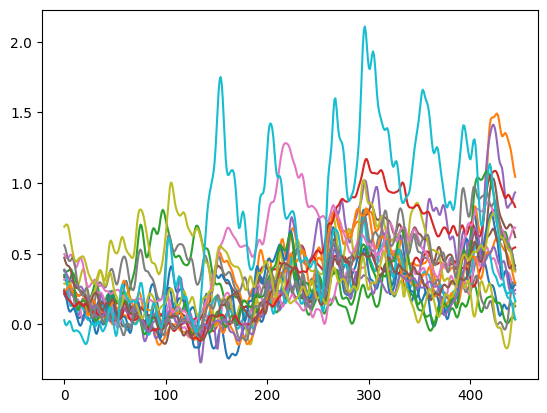

In [74]:
session_num = 0
trial_num = 57
whole_trial_activity = parsed_sessions[session_num]['whole_trial_activity'][trial_num]
print(whole_trial_activity.shape[1])
for neuron in range(whole_trial_activity.shape[1]):
    plt.plot(whole_trial_activity[:,neuron])

In [86]:
print(parsed_sessions[0]['whole_trial_activity'][57].shape)
print(parsed_sessions[0]['allpos_cell_gd'][57].shape)
print(parsed_sessions[0]['all_virmen_time_cell'][57].shape)

(445, 20)
(400, 3)
(400, 1)


In [87]:
parsed_sessions[0]['all_virmen_time_cell'][1]

array([[ 0.        ],
       [ 0.03851945],
       [ 0.10834114],
       [ 0.17306954],
       [ 0.24363787],
       [ 0.30831864],
       [ 0.37302431],
       [ 0.44363165],
       [ 0.51421767],
       [ 0.57894909],
       [ 0.6436103 ],
       [ 0.71422189],
       [ 0.77891123],
       [ 0.84361523],
       [ 0.91419768],
       [ 0.98482364],
       [ 1.04949152],
       [ 1.11419261],
       [ 1.18477476],
       [ 1.25537074],
       [ 1.32007122],
       [ 1.38482392],
       [ 1.45536852],
       [ 1.52007759],
       [ 1.58477652],
       [ 1.65536153],
       [ 1.72593355],
       [ 1.79066348],
       [ 1.85535562],
       [ 1.92594337],
       [ 1.9906342 ],
       [ 2.05535531],
       [ 2.12592292],
       [ 2.19651365],
       [ 2.26122665],
       [ 2.32591248],
       [ 2.39652014],
       [ 2.46710849],
       [ 2.53179407],
       [ 2.59651923],
       [ 2.66708779],
       [ 2.73179436],
       [ 2.79648995],
       [ 2.8671062 ],
       [ 2.93767238],
       [ 3

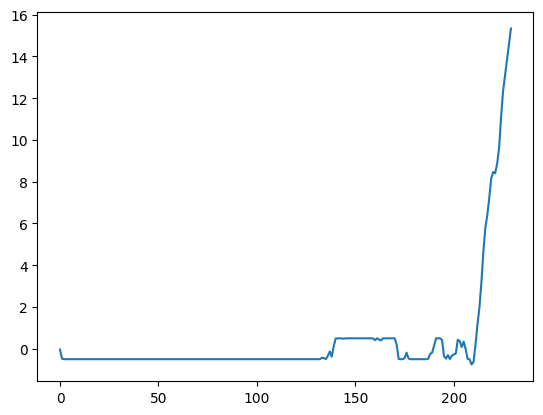

In [83]:
sample_behavior = parsed_sessions[0]['allpos_cell_gd'][54]
for dim in range(1):
    plt.plot(sample_behavior[:,dim])
plt.show()

In [54]:
for i, cue_onset_onehot in enumerate(parsed_sessions[0]['lr_cue_onset'][1]):
    if np.array_equal(cue_onset_onehot, [0, 1]) or np.array_equal(cue_onset_onehot, [1, 0]):
        print(i)

27
40
50
72
87
110
118
126
134
148
156


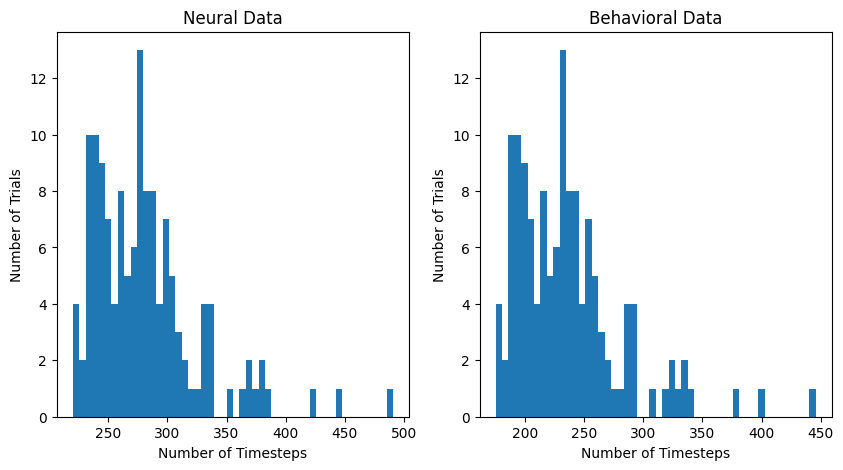

In [35]:
session_num = 0
trial_num_timesteps_neural = [trial.shape[0] for trial in parsed_sessions[session_num]['whole_trial_activity']]
trial_num_timesteps_behav = [trial.shape[0] for trial in parsed_sessions[session_num]['allpos_cell_gd']]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(trial_num_timesteps_neural, bins=50)
ax[0].set_title('Neural Data')
ax[0].set_xlabel('Number of Timesteps')
ax[0].set_ylabel('Number of Trials')
ax[1].hist(trial_num_timesteps_behav, bins=50)
ax[1].set_title('Behavioral Data')
ax[1].set_xlabel('Number of Timesteps')
ax[1].set_ylabel('Number of Trials')
plt.show()

In [42]:
np.array(trial_num_timesteps_neural) - np.array(trial_num_timesteps_behav)

array([45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45])

In [43]:
for session_num in range(len(parsed_sessions)):
    trial_num_timesteps_neural = np.array([trial.shape[0] for trial in parsed_sessions[session_num]['whole_trial_activity']])
    trial_num_timesteps_behav = np.array([trial.shape[0] for trial in parsed_sessions[session_num]['allpos_cell_gd']])
    diff = trial_num_timesteps_neural - trial_num_timesteps_behav
    print(np.unique(diff))

[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]
[45]


In [ ]:
session_table = {}
for parsed_session in parsed_sessions:
    session_table[parsed_session['metadata']] = {
        
    }

dict_keys(['metadata', 'maze_vars', 'num_trials', 'whole_trial_activity', 'lr_cue_onset', 'lr_cue_pseudo_onset', 'all_choices_gd', 'prev_choices_gd', 'is_succ_gd', 'prev_issucc_gd', 'ypos_cell_gd', 'xpos_cell_gd', 'allpos_cell_gd', 'allveloc_cell_gd', 'pre_trial_activity', 'all_virmen_time_cell', 'good_tr', 'left_trialProb_gd', 'total_numcues', 'prev_numcues'])